In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
order = pd.read_csv('C:/Users/happy/Desktop/project/data/order.csv', index_col=0)
order_last = pd.read_csv('C:/Users/happy/Desktop/project/data/order_last.csv',index_col=0)

In [3]:
order.head()

,ID,board_station,alight_station,adult,teen,child,distance,fare,suc_status,suc_status_d,call_time,board_time,alight_time,suc_time,cancel_time,x,y,board_adm,alight_adm
0,1,10258,10093,1,0,0,0.0,0,배차불가,NaN,2021-02-15 00:00:24,NaN,NaN,NaN,2021-02-15 00:00:25,37.508302,126.513957,운북동,운남동
1,7,10258,12005,1,0,0,0.0,0,배차불가,NaN,2021-02-15 00:00:35,NaN,NaN,NaN,2021-02-15 00:00:35,37.508586,126.513748,운북동,운서동(주거)
2,1,10258,10093,1,0,0,0.0,0,배차불가,NaN,2021-02-15 00:00:46,NaN,NaN,NaN,2021-02-15 00:00:46,37.508371,126.514027,운북동,운남동
3,7901,10258,10196,1,0,0,0.0,0,배차불가,NaN,2021-02-15 00:00:47,NaN,NaN,NaN,2021-02-15 00:00:47,37.508612,126.513747,운북동,운북동
4,7,10258,12005,1,0,0,0.0,0,배차불가,NaN,2021-02-15 00:00:56,NaN,NaN,NaN,2021-02-15 00:00:56,37.508598,126.513748,운북동,운서동(주거)


In [4]:
# column 별 null 값 갯수
order.isnull().sum()

ID                      0
board_station           0
alight_station          0
adult                   0
teen                    0
child                   0
distance                0
fare                    0
suc_status              0
suc_status_d      3612594
call_time               0
board_time        3523346
alight_time       3523346
suc_time          3487874
cancel_time        129908
x                    4843
y                    4843
board_adm               0
alight_adm              2
dtype: int64

In [19]:
# datatype conversion 
order['call_time'] = order['call_time'].astype('datetime64')
order['board_time'] = order['board_time'].astype('datetime64')
order['alight_time'] = order['alight_time'].astype('datetime64')
order['suc_time'] = order['suc_time'].astype('datetime64')
order['cancel_time'] = order['cancel_time'].astype('datetime64')

In [20]:
order_last['call_time'] = order_last['call_time'].astype('datetime64')
order_last['board_time'] = order_last['board_time'].astype('datetime64')
order_last['alight_time'] = order_last['alight_time'].astype('datetime64')
order_last['suc_time'] = order_last['suc_time'].astype('datetime64')

# 1. 시간정보

## 1-1. Call Time

### 일별호출

In [7]:
print(min(order['call_time']))
print(max(order['call_time']))

2021-02-15 00:00:24
2022-07-02 22:59:05


기록상 호출 이력 날짜 : 2021년 2월 15일 ~ 2021년 5월 15일, 2021년 7월 25일 ~ 2022년 7월 2일 

In [8]:
df_1 = order.loc[:,['ID', 'call_time']]
df_1['call_time'] = df_1['call_time'].dt.strftime('%Y/%m/%d')
df_1.head()

,ID,call_time
0,1,2021/02/15
1,7,2021/02/15
2,1,2021/02/15
3,7901,2021/02/15
4,7,2021/02/15


<AxesSubplot:xlabel='call_time', ylabel='count'>

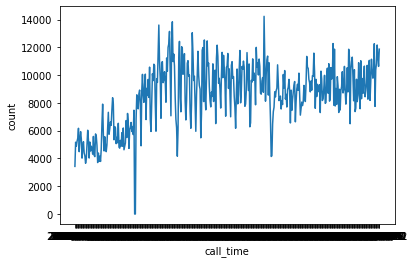

In [9]:
a = pd.DataFrame(df_1.groupby('call_time')['ID'].count()).rename(columns={'ID':'count'})
sns.lineplot(data = a, x = "call_time", y = "count")

# 급격히 호출 건수 감소 구역 : 기록 안된 날짜들 

In [10]:
# weekdays vs weekends
# 스프레드시트로 정리

In [11]:
# 하루 평균 순 호출 수
a['count'].mean()

8524.885780885781

In [12]:
df_2 = order_last.loc[:,['ID', 'call_time']]
df_2['call_time'] = df_2['call_time'].dt.strftime('%Y/%m/%d')
df_2.head()

,ID,call_time
0,1,2021/02/15
1,1,2021/02/15
2,1,2021/02/15
3,1,2021/02/15
4,1,2021/02/15


<AxesSubplot:xlabel='call_time', ylabel='count'>

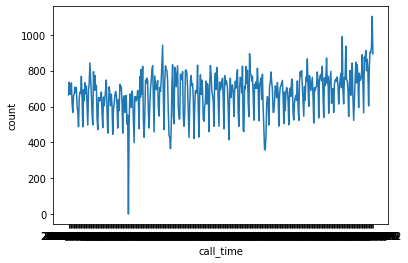

In [13]:
b = pd.DataFrame(df_2.groupby('call_time')['ID'].count()).rename(columns={'ID':'count'})
sns.lineplot(data = b, x = "call_time", y = "count")

# 급격히 호출 건수 감소 구역 : 기록 안된 날짜들 

In [14]:
# 실 이동수요 반영한 하루 평균 호출 수
b['count'].mean()

675.1098130841121

### 시간대별 호출

In [15]:
df_3 = order_last.loc[:,['ID', 'call_time']]
df_3['call_time'] = df_3['call_time'].dt.strftime('%H')
df_3.head()

,ID,call_time
0,1,00
1,1,00
2,1,00
3,1,03
4,1,19


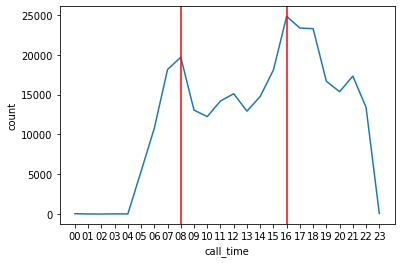

In [16]:
c = pd.DataFrame(df_3.groupby('call_time')['ID'].count()).rename(columns={'ID':'count'})
sns.lineplot(data = c, x = "call_time", y = "count")
plt.axvline(x=8, color = 'red')
plt.axvline(x=16, color = 'red')

## 1-2. Waiting Time

In [17]:
# 파생변수 wait_time 생성
order['wait_time'] = order['board_time'] - order['call_time']
order_last['wait_time'] = order['board_time'] - order['call_time']
order.head(3)

,ID,board_station,alight_station,adult,teen,child,distance,fare,suc_status,suc_status_d,call_time,board_time,alight_time,suc_time,cancel_time,x,y,board_adm,alight_adm,wait_time
0,1,10258,10093,1,0,0,0.0,0,배차불가,NaN,2021-02-15 00:00:24,NaT,NaT,NaT,2021-02-15 00:00:25,37.508302,126.513957,운북동,운남동,NaT
1,7,10258,12005,1,0,0,0.0,0,배차불가,NaN,2021-02-15 00:00:35,NaT,NaT,NaT,2021-02-15 00:00:35,37.508586,126.513748,운북동,운서동(주거),NaT
2,1,10258,10093,1,0,0,0.0,0,배차불가,NaN,2021-02-15 00:00:46,NaT,NaT,NaT,2021-02-15 00:00:46,37.508371,126.514027,운북동,운남동,NaT


In [18]:
order_last['wait_time'] = order_last['wait_time'].astype("timedelta64[s]") / 60

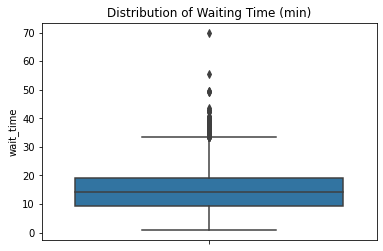

In [19]:
sns.boxplot( y=order_last["wait_time"] )
plt.title("Distribution of Waiting Time (min)")
plt.show()

In [20]:
order_last['wait_time'].describe()

count    16895.000000
mean        14.662348
std          7.003911
min          0.750000
25%          9.416667
50%         14.200000
75%         18.983333
max         69.933333
Name: wait_time, dtype: float64

<AxesSubplot:xlabel='wait_time', ylabel='Count'>

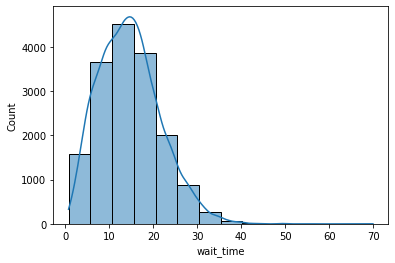

In [21]:
sns.histplot(data=order_last, x="wait_time", bins = 14, kde = 'True')

## 1-3. Interval btw call & cancel

In [22]:
order_cancel = order[(order['call_time'].notnull() & order['cancel_time'].notnull())]
order_cancel.shape

(3527268, 20)

In [23]:
(order_cancel['cancel_time'] == order_cancel['call_time']).sum()

1467502

In [ ]:
order_cancel['interval'] = order_cancel['cancel_time'] - order_cancel['call_time']
order_cancel['interval'] = order_cancel['interval'].astype("timedelta64[s]") / 60
order_cancel = order_cancel[(order_cancel['interval'] >= 0) & (order_cancel['interval'] <60)]

In [25]:
((order_cancel['interval'] > 0) & (order_cancel['interval'] < 1)).sum()

2023549

In [26]:
(order_cancel['interval'] > 1).sum()

35892

In [27]:
order_cancel['interval'].describe()

count    3.527127e+06
mean     1.144908e-01
std      1.312087e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.666667e-02
75%      3.333333e-02
max      5.998333e+01
Name: interval, dtype: float64

<AxesSubplot:xlabel='interval', ylabel='Count'>

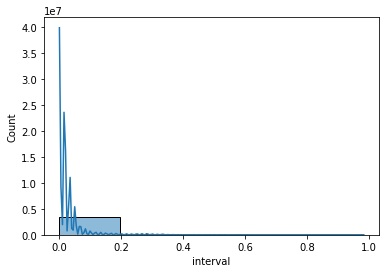

In [28]:
# interval time under 1 min
sns.histplot(data=order_cancel[order_cancel['interval']<1], x="interval", bins = 5, kde = 'True')

<AxesSubplot:xlabel='interval', ylabel='Count'>

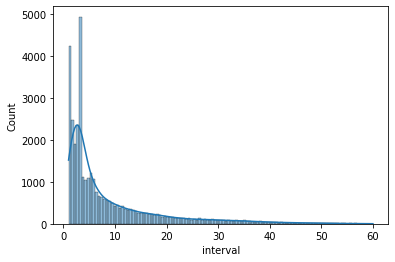

In [29]:
# interval time over 1 min
sns.histplot(data = order_cancel[order_cancel['interval']>1], x="interval", kde = 'True')

## 1-4. Board / Alight Time

In [30]:
print(min(order[order['board_time'].notnull()]['board_time']))
print(max(order[order['board_time'].notnull()]['board_time']))

2021-02-15 00:09:11
2022-07-02 23:13:50


In [31]:
print(min(order[order['alight_time'].notnull()]['alight_time']))
print(max(order[order['alight_time'].notnull()]['alight_time']))

2021-02-15 00:10:58
2022-07-02 23:23:14


In [32]:
full_ride = order_last[(order_last['board_time'].notnull())]

In [33]:
df_4 = full_ride.loc[:,['ID', 'board_time', 'alight_time']]
df_4['alight_time'] = df_4['alight_time'].dt.strftime('%Y/%m/%d')
df_4.head()

,ID,board_time,alight_time
2,1,2021-02-15 01:54:27,2021/02/15
6,1,2021-02-15 19:30:53,2021/02/15
72,5,2021-02-15 00:17:47,2021/02/15
73,5,2021-02-15 03:14:01,2021/02/15
80,6,2021-02-15 01:18:12,2021/02/15


<AxesSubplot:xlabel='alight_time', ylabel='count'>

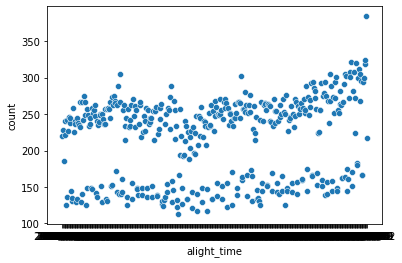

In [34]:
d = pd.DataFrame(df_4.groupby('alight_time')['ID'].count()).rename(columns={'ID':'count'})
sns.scatterplot(data = d, x = "alight_time", y = "count")

In [35]:
# weekdays vs weekends 
df_6 = full_ride.loc[:,['ID', 'alight_time', 'board_time']]
df_6['alight_time'] = df_6['alight_time'].dt.strftime('%A')
df_6.head()

,ID,alight_time,board_time
2,1,Monday,2021-02-15 01:54:27
6,1,Monday,2021-02-15 19:30:53
72,5,Monday,2021-02-15 00:17:47
73,5,Monday,2021-02-15 03:14:01
80,6,Monday,2021-02-15 01:18:12


In [36]:
g = pd.DataFrame(df_6.groupby('alight_time')['ID'].count()).rename(columns={'ID':'count'})
g

,count
alight_time,
Friday,15950
Monday,14530
Saturday,9356
Sunday,8575
Thursday,15368
Tuesday,14876
Wednesday,14732


saturday & sunday에 count가 현저히 떨어짐

위 그래프에서 count가 떨어지는 점들은 주말임 (확인용)

Text(0.5, 1.0, 'Count by Time Boarded')

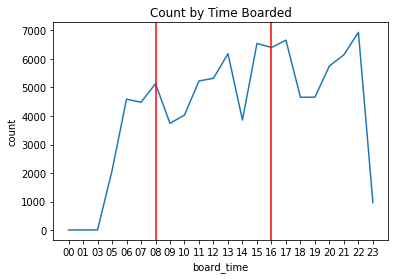

In [37]:
df_5 = full_ride.loc[:,['ID', 'board_time', 'alight_time']]
df_5['board_time'] = df_5['board_time'].dt.strftime('%H')
df_5['alight_time'] = df_5['alight_time'].dt.strftime('%H')

e = pd.DataFrame(df_5.groupby('board_time')['ID'].count()).rename(columns={'ID':'count'})
sns.lineplot(data = e, x = "board_time", y = "count")
plt.axvline(x=6, color = 'red')
plt.axvline(x=14, color = 'red')
plt.title('Count by Time Boarded')

Text(0.5, 1.0, 'Count by Time Alighted')

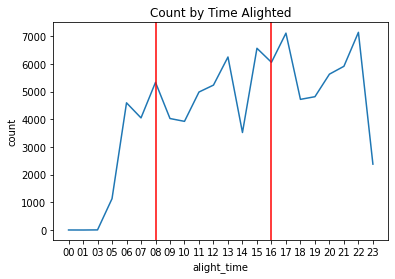

In [38]:
f = pd.DataFrame(df_5.groupby('alight_time')['ID'].count()).rename(columns={'ID':'count'})
sns.lineplot(data = f, x = "alight_time", y = "count")
plt.axvline(x=6, color = 'red')
plt.axvline(x=14, color = 'red')
plt.title('Count by Time Alighted')

## 1-5. 이동시간

In [21]:
# 파생변수 ivt 생성
order['ivt'] = order['alight_time'] - order['board_time']
order_last['ivt'] = order['alight_time'] - order['board_time']
order.head(3)

,ID,board_station,alight_station,adult,teen,child,distance,fare,suc_status,suc_status_d,call_time,board_time,alight_time,suc_time,cancel_time,x,y,board_adm,alight_adm,ivt
0,1,10258,10093,1,0,0,0.0,0,배차불가,NaN,2021-02-15 00:00:24,NaT,NaT,NaT,2021-02-15 00:00:25,37.508302,126.513957,운북동,운남동,NaT
1,7,10258,12005,1,0,0,0.0,0,배차불가,NaN,2021-02-15 00:00:35,NaT,NaT,NaT,2021-02-15 00:00:35,37.508586,126.513748,운북동,운서동(주거),NaT
2,1,10258,10093,1,0,0,0.0,0,배차불가,NaN,2021-02-15 00:00:46,NaT,NaT,NaT,2021-02-15 00:00:46,37.508371,126.514027,운북동,운남동,NaT


In [22]:
order_last['ivt'] = order_last['ivt'].astype("timedelta64[s]") / 60
order_last['ivt'].describe()

count    16895.000000
mean        16.095405
std         13.319817
min          0.200000
25%         11.000000
50%         14.766667
75%         19.650000
max       1029.300000
Name: ivt, dtype: float64

<AxesSubplot:xlabel='ivt', ylabel='Count'>

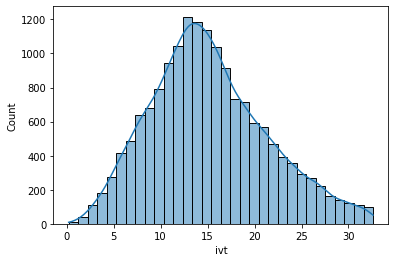

In [26]:
# outlier 제거 후 분포 시각화
IQR =  19.65 - 11
limit_1 = 11 - IQR * 1.5
limit_2 = 19.65 + IQR * 1.5
sns.histplot(data = order_last[(order_last['ivt']>limit_1) & (order_last['ivt']<limit_2)], x="ivt",bins= 32, kde = 'True')

In [24]:
order_last[(order_last['ivt']>limit_1) & (order_last['ivt']<limit_2)]['ivt'].describe()

count    16335.000000
mean        15.166706
std          6.184487
min          0.200000
25%         10.850000
50%         14.516667
75%         19.016667
max         32.616667
Name: ivt, dtype: float64

# 2. 공간정보

## 2-1. Call Location (x,y)

arcgis로 호출 위치 좌표 시각화

## 2-2. Board station & Alight station

In [72]:
order_last['board_station'].value_counts()

10046    12614
10086    11700
10400     8843
10120     6951
10910     6906
         ...  
10222        1
10071        1
10239        1
10220        1
10255        1
Name: board_station, Length: 311, dtype: int64

In [76]:
order_last['board_adm'].value_counts(normalize='True')

운서동(주거)    0.359900
중산동        0.310960
운서동(공항)    0.143379
운남동        0.124241
운북동        0.056647
덕교동        0.002883
을왕동        0.001540
남북동        0.000450
Name: board_adm, dtype: float64

In [78]:
order_last['alight_station'].value_counts()

10046    15715
10400    10982
10011     6912
12007     6557
10010     6493
         ...  
10220        2
12004        2
10250        1
10222        1
21248        1
Name: alight_station, Length: 317, dtype: int64

In [79]:
order_last['alight_adm'].value_counts(normalize = 'True')

운서동(주거)    0.306424
중산동        0.304860
운서동(공항)    0.180542
운남동        0.121538
운북동        0.074308
덕교동        0.006797
을왕동        0.004233
남북동        0.001298
Name: alight_adm, dtype: float64

In [61]:
station = pd.read_csv('C:/Users/happy/Desktop/project/data/station_list_ADM.csv')
station = station.drop(columns = ['input_date', 'is_using'])
station.head(1)

,id,name,x,y,st_no,ADM
0,10011,힐스테이트,126.564239,37.489032,35458.0,중산동


In [69]:
order_last[['ID','board_station','alight_station','suc_status']]

,ID,board_station,alight_station
0,1,10258,10203
1,1,10263,10093
2,1,10172,10205
3,1,10260,10205
4,1,10911,10258
...,...,...,...
288942,11577,21367,10147
288943,11577,10046,10095
288944,11577,10109,10095
288945,11577,10010,21367


In [70]:
station_board = pd.merge(order_last[['ID','board_station','alight_station','suc_status']],station,left_on='board_station',right_on='id',how='left')
station_board.head(1)

,ID,board_station,alight_station,suc_status,id,name,x,y,st_no,ADM
0,1,10258,10203,탑승취소,10258,예드림빌라입구,126.512309,37.507848,35546.0,운북동


In [71]:
station_alight = pd.merge(order_last[['ID','board_station','alight_station','suc_status']],station,left_on='alight_station',right_on='id',how='left')
station_alight.head(1)

,ID,board_station,alight_station,suc_status,id,name,x,y,st_no,ADM
0,1,10258,10203,탑승취소,10203.0,예단포,126.503989,37.527344,35395.0,운북동


In [80]:
station_board.to_csv('C:/Users/happy/Desktop/project/data/station_board.csv')
station_alight.to_csv('C:/Users/happy/Desktop/project/data/station_alight.csv')

## 2-3.Board ADM & Alight ADM

In [42]:
# 총 이동인원
order_last['PassNum'] = order_last['adult'] + order['teen'] + order['child']

import numpy as np

od_table_all = pd.pivot_table(order_last, index='board_adm', columns='alight_adm', values='PassNum', aggfunc=np.sum)
od_table_all.loc['계', :] = od_table_all.sum(axis=0)
od_table_all['계'] = od_table_all.sum(axis=1)

od_table_success = pd.pivot_table(order_last.loc[order_last['suc_status'] == '하차완료', :], index='board_adm', columns='alight_adm', values='PassNum', aggfunc=np.sum).fillna(0)
od_table_success.loc['계', :] = od_table_success.sum(axis=0)
od_table_success['계'] = od_table_success.sum(axis=1)

od_table_success_rate = (od_table_success / od_table_all * 100).apply(lambda x: round(x, 2))


In [43]:
# 호출이력 (실수요 반영)에 따른 od table
od_table_all

alight_adm,남북동,덕교동,운남동,운북동,운서동(공항),운서동(주거),을왕동,중산동,계
board_adm,,,,,,,,,
남북동,2.0,4.0,12.0,2.0,42.0,77.0,4.0,31.0,174.0
덕교동,5.0,10.0,130.0,40.0,91.0,608.0,11.0,224.0,1119.0
운남동,41.0,166.0,1146.0,4319.0,10339.0,10755.0,132.0,9136.0,36034.0
운북동,10.0,76.0,3676.0,829.0,524.0,1458.0,32.0,11576.0,18181.0
운서동(공항),76.0,183.0,8191.0,301.0,585.0,26816.0,175.0,13784.0,50111.0
운서동(주거),220.0,1463.0,11612.0,2112.0,32137.0,14502.0,1084.0,40299.0,103429.0
을왕동,12.0,13.0,42.0,14.0,53.0,399.0,11.0,105.0,649.0
중산동,115.0,616.0,9713.0,15493.0,17233.0,37000.0,316.0,9793.0,90279.0
계,481.0,2531.0,34522.0,23110.0,61004.0,91615.0,1765.0,84948.0,299976.0


In [44]:
# 하차완료한 승하차 이력에 따른 od table
od_table_success

alight_adm,남북동,덕교동,운남동,운북동,운서동(공항),운서동(주거),을왕동,중산동,계
board_adm,,,,,,,,,
남북동,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,7.0
덕교동,0.0,0.0,2.0,1.0,0.0,10.0,0.0,9.0,22.0
운남동,2.0,13.0,321.0,1044.0,4511.0,2901.0,7.0,3040.0,11839.0
운북동,2.0,22.0,1140.0,162.0,172.0,453.0,2.0,3345.0,5298.0
운서동(공항),12.0,4.0,2657.0,73.0,156.0,6972.0,5.0,3759.0,13638.0
운서동(주거),39.0,165.0,3352.0,805.0,11708.0,3469.0,54.0,15529.0,35121.0
을왕동,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0
중산동,10.0,97.0,3564.0,3398.0,5886.0,14490.0,8.0,2820.0,30273.0
계,65.0,301.0,11036.0,5483.0,22433.0,28302.0,76.0,28505.0,96201.0


In [45]:
# 하차완료 / 승차 수요 = 성공률 (o-d)
od_table_success_rate

alight_adm,남북동,덕교동,운남동,운북동,운서동(공항),운서동(주거),을왕동,중산동,계
board_adm,,,,,,,,,
남북동,0.00,0.00,0.00,0.00,0.00,5.19,0.00,9.68,4.02
덕교동,0.00,0.00,1.54,2.50,0.00,1.64,0.00,4.02,1.97
운남동,4.88,7.83,28.01,24.17,43.63,26.97,5.30,33.27,32.86
운북동,20.00,28.95,31.01,19.54,32.82,31.07,6.25,28.90,29.14
운서동(공항),15.79,2.19,32.44,24.25,26.67,26.00,2.86,27.27,27.22
운서동(주거),17.73,11.28,28.87,38.12,36.43,23.92,4.98,38.53,33.96
을왕동,0.00,0.00,0.00,0.00,0.00,0.75,0.00,0.00,0.46
중산동,8.70,15.75,36.69,21.93,34.16,39.16,2.53,28.80,33.53
계,13.51,11.89,31.97,23.73,36.77,30.89,4.31,33.56,32.07


## 2-4. Distance

order_last (호출이력)

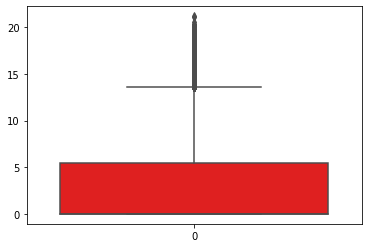

In [46]:
sns.boxplot(data=order_last['distance'],color='red')
plt.show()

In [47]:
order_last['distance'].describe()

count    288947.000000
mean          2.635129
std           3.932684
min           0.000000
25%           0.000000
50%           0.000000
75%           5.440000
max          21.170000
Name: distance, dtype: float64

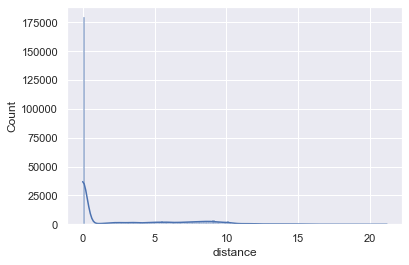

In [48]:
sns.set(style="darkgrid")
sns.histplot(data=order_last, x='distance', kde=True)
plt.show()

In [54]:
order_last[order_last['distance']==0]['suc_status'].value_counts()

배차불가       142852
시뮬레이션취소     36424
시스템취소         175
탑승취소            3
Name: suc_status, dtype: int64

In [49]:
# 이동거리가 0인 행 제거

order_last[order_last['distance']>0]['distance'].describe()

count    109493.000000
mean          6.953985
std           3.283408
min           0.060000
25%           4.500000
50%           7.100000
75%           9.070000
max          21.170000
Name: distance, dtype: float64

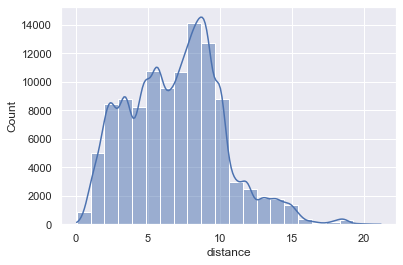

In [57]:
sns.set(style="darkgrid")
sns.histplot(data=order_last[order_last['distance']>0], x='distance', bins = 22, kde=True)
plt.show()

하차완료 승객 (실제 이동한 승객)

In [55]:
order_last[order_last['suc_status']=='하차완료']['distance'].describe()

count    93387.000000
mean         7.052473
std          3.255165
min          0.190000
25%          4.630000
50%          7.230000
75%          9.090000
max         21.170000
Name: distance, dtype: float64

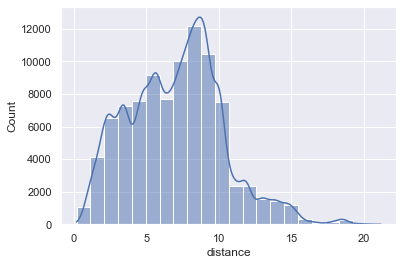

In [58]:
sns.set(style="darkgrid")
sns.histplot(data=order_last[order_last['suc_status']=='하차완료'], x='distance', bins = 22, kde=True)
plt.show()

# 3. 승객정보

## 3-1. Adult/Teen/Child

In [5]:
order_last['passenger_tot'] = order_last['adult'] + order_last['teen'] + order_last['child']

In [12]:
order_last[order_last['suc_status']=='하차완료']['passenger_tot'].value_counts(normalize='True')

1    0.914592
2    0.074711
3    0.008095
4    0.001756
5    0.000610
6    0.000236
Name: passenger_tot, dtype: float64

In [9]:
order_last[order_last['suc_status']=='하차완료'].groupby('adult')['ID'].count()

adult
0    16014
1    72960
2     4128
3      205
4       50
5       18
6       12
Name: ID, dtype: int64

In [13]:
order_last[order_last['suc_status']=='하차완료'].groupby('teen')['ID'].count()

teen
0    77900
1    13493
2     1641
3      255
4       68
5       22
6        8
Name: ID, dtype: int64

In [14]:
order_last[order_last['suc_status']=='하차완료'].groupby('child')['ID'].count()

child
0    91166
1     1937
2      253
3       24
4        7
Name: ID, dtype: int64

In [16]:
order

,ID,board_station,alight_station,adult,teen,child,distance,fare,suc_status,suc_status_d,call_time,board_time,alight_time,suc_time,cancel_time,x,y,board_adm,alight_adm
0,1,10258,10093,1,0,0,0.00,0,배차불가,NaN,2021-02-15 00:00:24,NaN,NaN,NaN,2021-02-15 00:00:25,37.508302,126.513957,운북동,운남동
1,7,10258,12005,1,0,0,0.00,0,배차불가,NaN,2021-02-15 00:00:35,NaN,NaN,NaN,2021-02-15 00:00:35,37.508586,126.513748,운북동,운서동(주거)
2,1,10258,10093,1,0,0,0.00,0,배차불가,NaN,2021-02-15 00:00:46,NaN,NaN,NaN,2021-02-15 00:00:46,37.508371,126.514027,운북동,운남동
3,7901,10258,10196,1,0,0,0.00,0,배차불가,NaN,2021-02-15 00:00:47,NaN,NaN,NaN,2021-02-15 00:00:47,37.508612,126.513747,운북동,운북동
4,7,10258,12005,1,0,0,0.00,0,배차불가,NaN,2021-02-15 00:00:56,NaN,NaN,NaN,2021-02-15 00:00:56,37.508598,126.513748,운북동,운서동(주거)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657171,11188,10910,10183,1,0,0,0.00,0,시뮬레이션취소,NaN,2022-07-02 22:57:35,NaN,NaN,NaN,2022-07-02 22:57:44,37.488924,126.559806,중산동,중산동
3657172,11188,10910,10183,1,0,0,0.00,0,배차불가,NaN,2022-07-02 22:57:55,NaN,NaN,NaN,2022-07-02 22:57:56,37.488924,126.559806,중산동,중산동
3657173,11188,10910,10183,1,0,0,0.00,0,배차불가,NaN,2022-07-02 22:58:07,NaN,NaN,NaN,2022-07-02 22:58:07,37.488924,126.559806,중산동,중산동
3657174,11188,10910,10183,1,0,0,2.63,1800,하차완료,NaN,2022-07-02 22:58:17,2022-07-02 23:03:44,2022-07-02 23:15:47,2022-07-02 22:58:24,NaN,37.488924,126.559806,중산동,중산동
